#### RSC sequence from Bao et al. PRX (2024)

In [12]:
import numpy as np
import scipy.constants as cts
import scipy.stats as stats
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from scipy.special import hermite, factorial
import RSC_functions
import sequence_functions
from pathos.multiprocessing import Pool

In [13]:
sequence_XY, sequence_XYZ1, sequence_XYZ2, sequence_XYZ3, sequence_XYZ4 = sequence_functions.get_original_sequence()
ground_state_counts = []
nums_survive = []
sems = []
n_bars = []

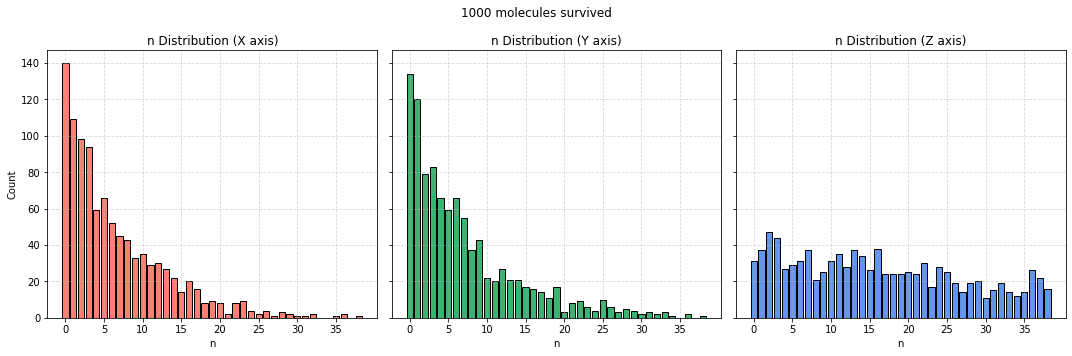

In [15]:
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

## 10 * XY

Applying pulses: 100%|██████████| 4/4 [00:00<00:00, 43.84it/s]


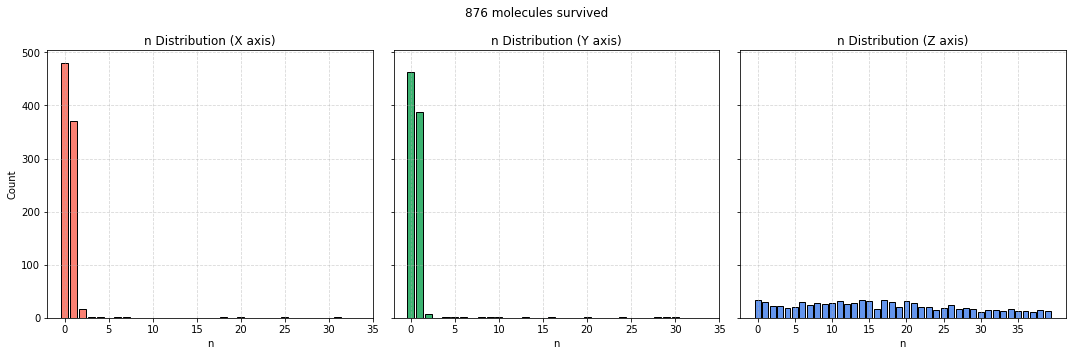

In [16]:
for n in range(10):
    n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XY, print_report=False
    )
    ground_state_counts.append(ground_state_count)
    sems.append(sem)
    nums_survive.append(num_survive)
    n_bars.append(n_bar)
    states_x, states_y, states_z, avg_n, grd_n = RSC_functions.readout_molecule_properties(mol_list)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

## 5 * XYZ1

Applying pulses: 100%|██████████| 8/8 [00:00<00:00, 11.12it/s]


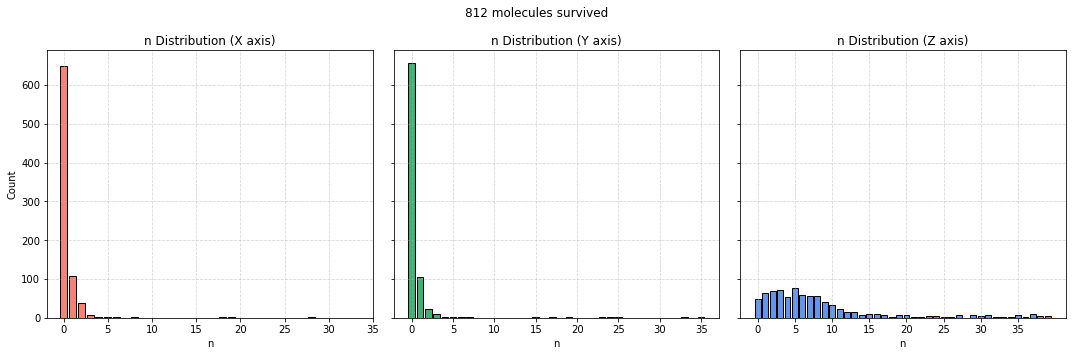

In [17]:
for n in range(5):
    n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XYZ1, print_report=False
    )
    ground_state_counts.append(ground_state_count)
    sems.append(sem)
    nums_survive.append(num_survive)
    n_bars.append(n_bar)
    states_x, states_y, states_z, avg_n, grd_n = RSC_functions.readout_molecule_properties(mol_list)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

## 5 * XYZ2

Applying pulses: 100%|██████████| 8/8 [00:00<00:00, 13.30it/s]


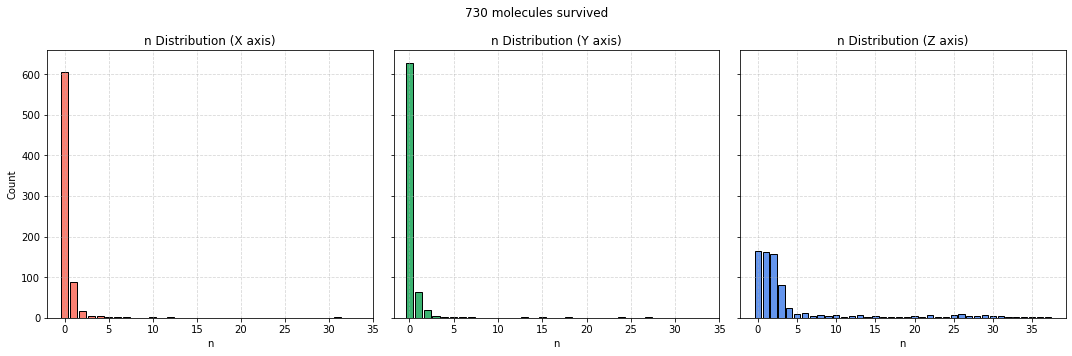

In [18]:
for n in range(5):
    n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XYZ2, print_report=False
    )
    ground_state_counts.append(ground_state_count)
    sems.append(sem)
    nums_survive.append(num_survive)
    n_bars.append(n_bar)
    states_x, states_y, states_z, avg_n, grd_n = RSC_functions.readout_molecule_properties(mol_list)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

### 10 * XYZ3

Applying pulses: 100%|██████████| 8/8 [00:00<00:00, 29.03it/s]


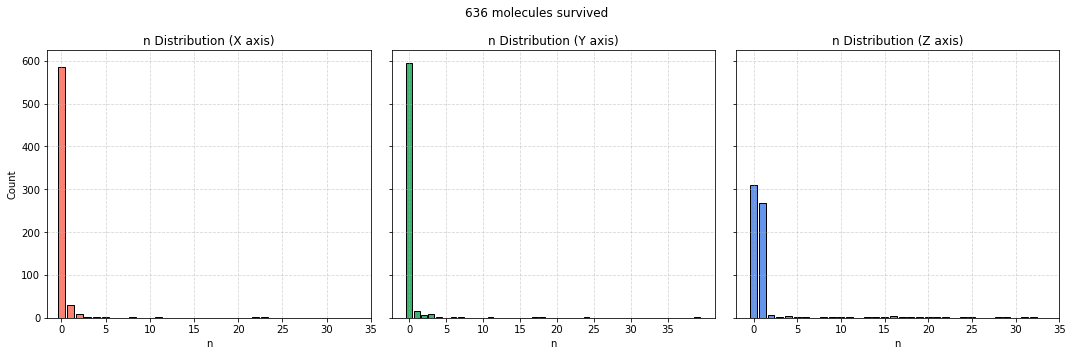

In [19]:
for n in range(10):
    n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XYZ3, print_report=False
    )
    ground_state_counts.append(ground_state_count)
    sems.append(sem)
    nums_survive.append(num_survive)
    n_bars.append(n_bar)
    states_x, states_y, states_z, avg_n, grd_n = RSC_functions.readout_molecule_properties(mol_list)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

### 10 * XYZ4

Applying pulses: 100%|██████████| 8/8 [00:00<00:00, 21.32it/s]


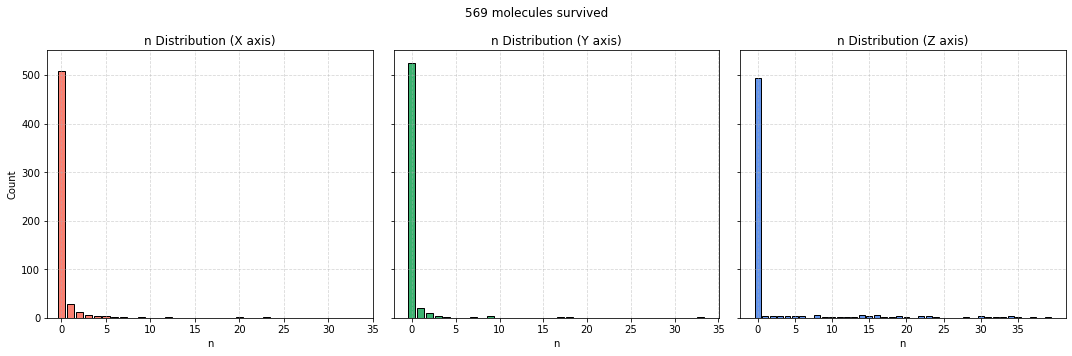

In [20]:
for n in range(10):
    n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XYZ4, print_report=False
    )
    ground_state_counts.append(ground_state_count)
    sems.append(sem)
    nums_survive.append(num_survive)
    n_bars.append(n_bar)
    states_x, states_y, states_z, avg_n, grd_n = RSC_functions.readout_molecule_properties(mol_list)
_, _, _ = RSC_functions.plot_n_distribution(mol_list)

#### Plot parameters vs pulse number

In [ ]:
sequence = sequence_functions.load_sequence('original.txt')
mol_list = RSC_functions.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
n_bar, num_survive, ground_state_count, sem = RSC_functions.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)
sems.append(sem)
nums_survive.append(num_survive)
n_bars.append(n_bar)

Applying pulses: 100%|██████████| 280/280 [00:24<00:00, 11.62it/s]


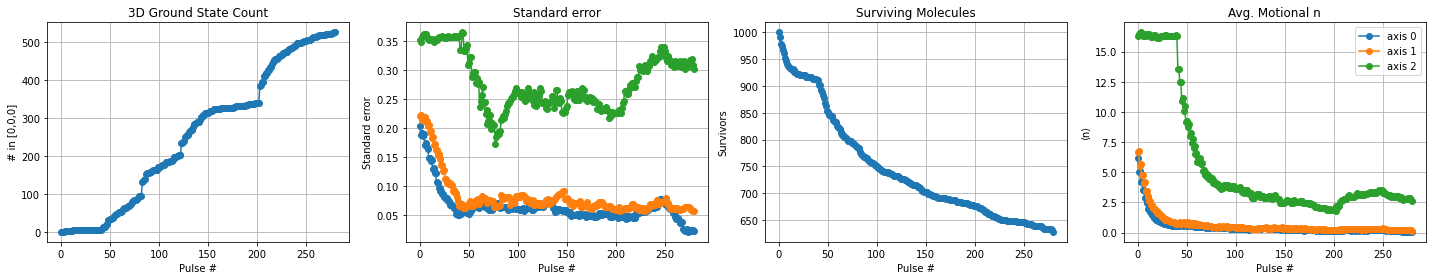

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Plot 1: Ground state count
axs[0].plot(range(len(ground_state_count)), ground_state_count, marker='o')
axs[0].set_title("3D Ground State Count")
axs[0].set_xlabel("Pulse #")
axs[0].set_ylabel("# in [0,0,0]")
axs[0].grid(True)

# Plot 2: Standard error
for i in [0, 1, 2]:
    axs[1].plot(range(len(sem)), np.array(sem)[:, i], marker='o', label=f'axis {i}')
axs[1].set_title("Standard error")
axs[1].set_xlabel("Pulse #")
axs[1].set_ylabel("Standard error")
axs[1].grid(True)

# Plot 3: Molecules Survived
axs[2].plot(range(len(num_survive)), num_survive, marker='o')
axs[2].set_title("Surviving Molecules")
axs[2].set_xlabel("Pulse #")
axs[2].set_ylabel("Survivors")
axs[2].grid(True)

# Plot 4: Average n per axis
for i in [0, 1, 2]:
    axs[3].plot(range(len(n_bar)), np.array(n_bar)[:, i], marker='o', label=f'axis {i}')
axs[3].set_title("Avg. Motional n")
axs[3].set_xlabel("Pulse #")
axs[3].set_ylabel("⟨n⟩")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()
